# K-Means and Elbow Criterion

## Fitting a K-Means model to our data

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans

### We will use the iris dataset for this tutorial. It's one of the most recognizable and popular datasets around; one which most machine learning enthusiasts come across at one point or another.  It can be found at the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Iris). It's also provided as a part of the scikit-learn package.

In [2]:
# Loads the iris dataset
iris = datasets.load_iris()

In [3]:
# print(iris)

### We will need to extract required components from the 'iris' object obtained in the previous step. Namely the features and corresponding flower class. 

In [4]:
iris_data = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_target = pd.DataFrame(iris.target, columns=['target'])

### The target/class variable obtained in the previous is encoded as integers. We will use some python and pandas trickery to obtain the actual class names.

In [5]:
# Map encoded target values to target names
def map_target(target_num):
    return iris.target_names[int(target_num)]

iris_target_name = iris_target.apply(map_target, 1)

### Now that we have loaded and processed our data, we will go ahead and fit a K-means model to the data. We will use 3 of the 4 features available. This will make it easier for us to visualize the results of the model.

In [6]:
# Fit a K-Means model to the data
kmeans_3 = KMeans(n_clusters=3)
kmeans_iris = kmeans_3.fit(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])

### Below code allows us to visualize our K-Means model's results.

#### Visualization code adapted from [an example](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html) from scikit-learn documentation.

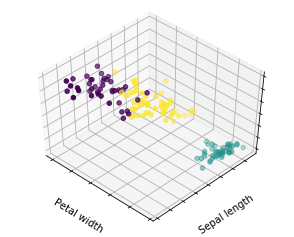

In [7]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = kmeans_iris.labels_

ax.scatter(iris_data.ix[:, 3], iris_data.ix[:, 0], iris_data.ix[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

### Below code visualizes actual classes from the iris data.

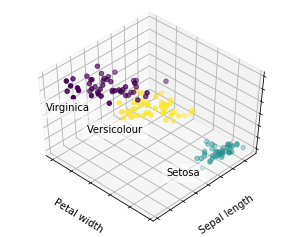

In [8]:
# Plot the ground truth
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris_data.ix[iris_target.target == label, 3].mean(),
              iris_data.ix[iris_target.target == label, 0].mean() + 1.5,
              iris_data.ix[iris_target.target == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(iris_target.target, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data.ix[:, 3], iris_data.ix[:, 0], iris_data.ix[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Next two lines show through summary statistics of actual classes and predicted clusters that how the algorithm clubbed together data points belonging to different classes.

In [9]:
print(pd.Series([(iris_target.loc[i][0], kmeans_iris.labels_[i]) for i in range(len(iris.target))]).value_counts())

(0, 1)    50
(1, 2)    45
(2, 0)    37
(2, 2)    13
(1, 0)     5
dtype: int64


In [10]:
print(pd.Series([(iris_target_name.loc[i][0], kmeans_iris.labels_[i]) for i in range(len(iris.target))]).value_counts())

(v, 2)    58
(s, 1)    50
(v, 0)    42
dtype: int64


### As the above visualizations and statistics show, our simple model has done a decent task of classifying the datapoints into separate clusters. You can see that the two plots resemble each other. When compared with actual classes, the model clustered together some datapoints belonging to different classes. Although the predictions aren’t perfect, they come close. That’s a win for the algorithm.

## Elbow criterion for finding optimum number of clusters

### In unsupervised learning, you rarely get an output that’s 100 percent accurate because real-world data is rarely that simple.  
### Apart from simplicity of the dataset, the reason why above model performed so well was because we knew beforehand the optimum numbers of clusters, i.e. 3. Out in the wild, you won’t know how many clusters to choose (or any initialization parameter for other clustering algorithms). Such parameter-tuning is critical.

### One of the methods for finding out the optimum number of clusters for K-Means algorithm is the _elbow criterion_. 
### The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. 
### The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


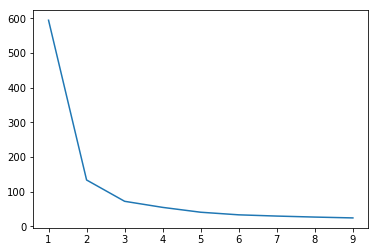

In [11]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']], maxK=10)


### As we can see from the above plot, 3 looks like a good choice for number of clusters.

### The elbow criterion doesn't always work well.. In cases like this, we might try a different method for determining the optimal k, such as computing silhouette scores, or we might reevaluate whether clustering is the right thing to do on our data.

## That's all folks!